In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/vgchartz-2024.csv')
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


Feature Engineering ideas


*   Drop img, and last update
*   release_date to Datetime
*   Sales ratios



In [4]:
df = df.drop(['img','last_update'],axis=1)

In [5]:
df['na_sales_proportion'] = df['na_sales'] / df['total_sales']
df['jp_sales_proportion'] = df['jp_sales'] / df['total_sales']
df['pal_sales_proportion'] = df['pal_sales'] / df['total_sales']
df['other_sales_proportion'] = df['other_sales'] / df['total_sales']

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,na_sales_proportion,jp_sales_proportion,pal_sales_proportion,other_sales_proportion
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,0.313484,0.048720,0.484744,0.153543
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,0.312532,0.030944,0.500774,0.155750
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,0.520743,0.029102,0.339938,0.110217
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,0.571248,0.003783,0.336066,0.089533
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,0.409543,0.027170,0.400928,0.161696


In [7]:
df.duplicated().sum()

21

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
missing_percentage = df.isna().sum()/len(df)*100
missing_percentage

,0
title,0.000000
console,0.000000
genre,0.000000
publisher,0.000000
developer,0.026565
critic_score,89.564810
total_sales,70.436753
na_sales,80.253145
jp_sales,89.494492
pal_sales,79.960934


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 15044
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   1210 non-null   object        
 1   console                 1210 non-null   object        
 2   genre                   1210 non-null   object        
 3   publisher               1210 non-null   object        
 4   developer               1210 non-null   object        
 5   critic_score            1210 non-null   float64       
 6   total_sales             1210 non-null   float64       
 7   na_sales                1210 non-null   float64       
 8   jp_sales                1210 non-null   float64       
 9   pal_sales               1210 non-null   float64       
 10  other_sales             1210 non-null   float64       
 11  release_date            1210 non-null   datetime64[ns]
 12  na_sales_proportion     1210 non-null   float64     

In [12]:
100-((1210/64016)*100)

98.10984753811547

# EDA

In [13]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,na_sales_proportion,jp_sales_proportion,pal_sales_proportion,other_sales_proportion
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210,1210.000000,1210.000000,1210.000000,1210.000000
mean,7.537769,1.499777,0.690438,0.106512,0.524727,0.178074,2009-05-21 11:32:37.685950464,0.463008,0.153491,0.282236,0.099744
min,3.000000,0.020000,0.010000,0.000000,0.000000,0.000000,1989-06-01 00:00:00,0.011628,0.000000,0.000000,0.000000
25%,6.800000,0.350000,0.140000,0.020000,0.050000,0.020000,2007-03-20 00:00:00,0.333333,0.015152,0.153846,0.066667
50%,7.700000,0.710000,0.290000,0.050000,0.200000,0.060000,2009-10-06 00:00:00,0.457291,0.060322,0.284466,0.090909
75%,8.400000,1.577500,0.727500,0.127500,0.530000,0.180000,2011-10-11 00:00:00,0.592593,0.241379,0.395294,0.126516
max,10.000000,20.320000,9.760000,1.870000,9.850000,3.120000,2018-11-16 00:00:00,0.944444,0.934426,0.933333,0.807163
std,1.200153,2.228479,1.097869,0.164748,0.953987,0.322764,NaN,0.188660,0.189390,0.169757,0.059703


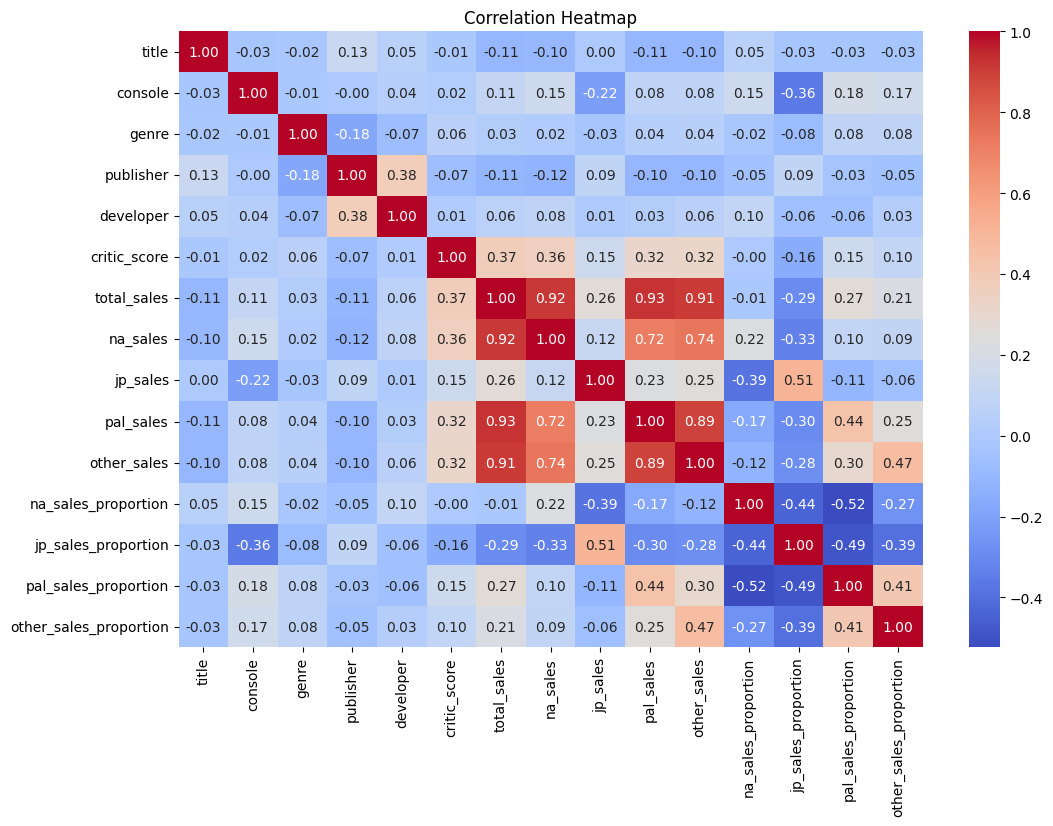

In [14]:
from sklearn.preprocessing import LabelEncoder
df_num = df.copy()
label_encoders = {}
for column in ['title', 'console', 'genre', 'publisher', 'developer']:
    le = LabelEncoder()
    df_num[column] = le.fit_transform(df_num[column])
    label_encoders[column] = le

correlation_matrix = df_num.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from google.colab import files

df.to_csv('cleaned_games_data.csv', index=False)
files.download('cleaned_games_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>